# **Space Race**

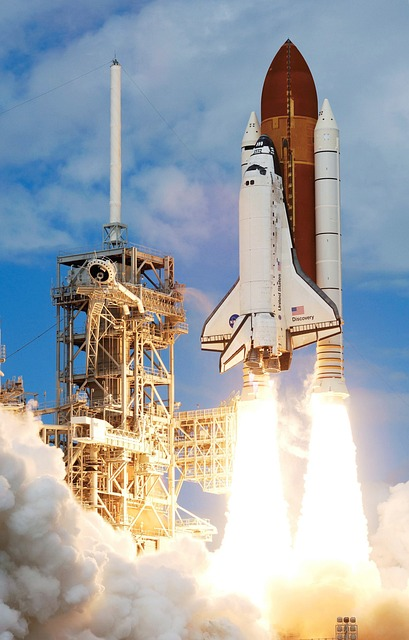

In [84]:
from IPython.display import Image
Image('rocket-launch-67649_640.png')

In [10]:
# %pip install --upgrade plotly

In [11]:
pip install iso3166

In [12]:
pip install pycountry

# **Import Statements**

In [13]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

from iso3166 import countries_by_name
import pycountry
import plotly.graph_objects as go


In [14]:
pd.options.display.float_format = '{:,.2f}'.format

In [15]:
df_data = pd.read_csv('Space_Corrected.csv')

## **Data Information And Cleaning**

In [16]:
df_data.shape

(4324, 7)

In [17]:
df_data

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


In [18]:
list[df_data.columns]

list[Index(['Company Name', 'Location', 'Datum', 'Detail', 'Status Rocket',
       ' Rocket', 'Status Mission'],
      dtype='object')]

In [19]:
df_data.duplicated().sum()

1

In [20]:
print(f'Any duplicates? {df_data.duplicated().values.any()}')

Any duplicates? True


In [21]:
nan_df = df_data.isna()
print(nan_df)

      Company Name  Location  Datum  Detail  Status Rocket   Rocket  \
0            False     False  False   False          False    False   
1            False     False  False   False          False    False   
2            False     False  False   False          False     True   
3            False     False  False   False          False    False   
4            False     False  False   False          False    False   
...            ...       ...    ...     ...            ...      ...   
4319         False     False  False   False          False     True   
4320         False     False  False   False          False     True   
4321         False     False  False   False          False     True   
4322         False     False  False   False          False     True   
4323         False     False  False   False          False     True   

      Status Mission  
0              False  
1              False  
2              False  
3              False  
4              False  
...      

In [22]:
print(df_data.columns.tolist())

['Company Name', 'Location', 'Datum', 'Detail', 'Status Rocket', ' Rocket', 'Status Mission']


In [23]:
df_data.columns = df_data.columns.str.strip()

In [24]:
df_data

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


In [25]:
df_data.dtypes

Company Name      object
Location          object
Datum             object
Detail            object
Status Rocket     object
Rocket            object
Status Mission    object
dtype: object

In [26]:
print(f'Any NaN values among the data? {df_data.isna().values.any()}')

Any NaN values among the data? True


In [27]:
df_data.isna().sum()

Company Name         0
Location             0
Datum                0
Detail               0
Status Rocket        0
Rocket            3360
Status Mission       0
dtype: int64

In [28]:
df_data

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


In [29]:
df_data['Rocket'] = df_data['Rocket'].replace(',', '', regex=True)

In [30]:
df_data['Rocket'] = df_data['Rocket'].astype(float).fillna(0.0)

In [31]:
df_data

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,0.00,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success
...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,0.00,Failure
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,0.00,Success
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,0.00,Failure
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,0.00,Success


In [32]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Company Name    4324 non-null   object 
 1   Location        4324 non-null   object 
 2   Datum           4324 non-null   object 
 3   Detail          4324 non-null   object 
 4   Status Rocket   4324 non-null   object 
 5   Rocket          4324 non-null   float64
 6   Status Mission  4324 non-null   object 
dtypes: float64(1), object(6)
memory usage: 236.6+ KB


In [33]:
df_data['Rocket'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 4324 entries, 0 to 4323
Series name: Rocket
Non-Null Count  Dtype  
--------------  -----  
4324 non-null   float64
dtypes: float64(1)
memory usage: 33.9 KB


In [34]:
df_data['Location']

0              LC-39A, Kennedy Space Center, Florida, USA
1       Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...
2                           Pad A, Boca Chica, Texas, USA
3            Site 200/39, Baikonur Cosmodrome, Kazakhstan
4                SLC-41, Cape Canaveral AFS, Florida, USA
                              ...                        
4319             LC-18A, Cape Canaveral AFS, Florida, USA
4320             LC-26A, Cape Canaveral AFS, Florida, USA
4321             LC-18A, Cape Canaveral AFS, Florida, USA
4322            Site 1/5, Baikonur Cosmodrome, Kazakhstan
4323            Site 1/5, Baikonur Cosmodrome, Kazakhstan
Name: Location, Length: 4324, dtype: object

# **Location column split to derive Country column**

In [35]:
df_data['Location'] = df_data['Location'].astype('string')
df_data.dtypes

Company Name              object
Location          string[python]
Datum                     object
Detail                    object
Status Rocket             object
Rocket                   float64
Status Mission            object
dtype: object

In [36]:
print(df_data['Location'][0].split(",")[2])

 Florida


In [37]:
#df_data['Country'] = df_data['Location'].str.split(',').str[-1]
#df_data['Country']

In [38]:
df_data['Country']=df_data['Location'].apply(lambda row: row.split(',')[-1])
df_data['Country']

0               USA
1             China
2               USA
3        Kazakhstan
4               USA
           ...     
4319            USA
4320            USA
4321            USA
4322     Kazakhstan
4323     Kazakhstan
Name: Country, Length: 4324, dtype: object

In [39]:
df_data

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,Country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,0.00,Success,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA
...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,0.00,Failure,USA
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,0.00,Success,USA
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,0.00,Failure,USA
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,0.00,Success,Kazakhstan


# **Datum column split to derive year**

In [40]:
df_data['Time'] = pd.to_datetime(df_data['Datum'], format='mixed')
df_data['Year'] = df_data['Time'].apply(lambda datetime: datetime.year)
df_data['Year']

0       2020
1       2020
2       2020
3       2020
4       2020
        ... 
4319    1958
4320    1958
4321    1957
4322    1957
4323    1957
Name: Year, Length: 4324, dtype: int64

In [41]:
df_data['Month'] = df_data['Time'].apply(lambda datetime: datetime.strftime('%B'))
df_data['Month']

0         August
1         August
2         August
3           July
4           July
          ...   
4319    February
4320    February
4321    December
4322    November
4323     October
Name: Month, Length: 4324, dtype: object

In [42]:
df_data['Day'] = df_data['Time'].apply(lambda datetime: datetime.strftime('%A'))
df_data['Day']

0          Friday
1        Thursday
2         Tuesday
3        Thursday
4        Thursday
          ...    
4319    Wednesday
4320     Saturday
4321       Friday
4322       Sunday
4323       Friday
Name: Day, Length: 4324, dtype: object

In [43]:
df_data

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,Country,Time,Year,Month,Day
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,2020-08-07 05:12:00+00:00,2020,August,Friday
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,2020-08-06 04:01:00+00:00,2020,August,Thursday
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,0.00,Success,USA,2020-08-04 23:57:00+00:00,2020,August,Tuesday
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan,2020-07-30 21:25:00+00:00,2020,July,Thursday
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA,2020-07-30 11:50:00+00:00,2020,July,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,0.00,Failure,USA,1958-02-05 07:33:00+00:00,1958,February,Wednesday
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,0.00,Success,USA,1958-02-01 03:48:00+00:00,1958,February,Saturday
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,0.00,Failure,USA,1957-12-06 16:44:00+00:00,1957,December,Friday
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,0.00,Success,Kazakhstan,1957-11-03 02:30:00+00:00,1957,November,Sunday


In [44]:
df_data.drop(columns=['Time'])

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,Country,Year,Month,Day
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,2020,August,Friday
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,2020,August,Thursday
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,0.00,Success,USA,2020,August,Tuesday
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan,2020,July,Thursday
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA,2020,July,Thursday
...,...,...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,0.00,Failure,USA,1958,February,Wednesday
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,0.00,Success,USA,1958,February,Saturday
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,0.00,Failure,USA,1957,December,Friday
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,0.00,Success,Kazakhstan,1957,November,Sunday


# **Plotly Donut Chart For Active And Retired Rockets.**

In [45]:
status = df_data['Status Rocket'].value_counts()
fig = px.pie(labels=status.index,
                 values=status.values,
                 title="Percentage of Active vs. Retired Rockets",
                 names=status.index,
                 hole=0.4,)

fig.update_traces(textposition='inside', textfont_size=15, textinfo='percent')

fig.show()

## **Number Of Launches Per Organisation**

In [46]:
number_launches = df_data['Company Name'].value_counts()
v_bar = px.bar(
            x = number_launches.index,
            y = number_launches.values,
            color = number_launches.values,
            color_continuous_scale='Aggrnyl',
            title='Number of Launches per Company')

v_bar.update_layout(xaxis_title='Space Companies',
                        coloraxis_showscale=False,
                        yaxis_title='Number of Launches')
v_bar.show()

# **Pie Chart For Number Of Launches Per Company**

In [47]:
country_yearly_launches = df_data.groupby('Country')['Year'].value_counts().rename_axis(["Country", "Year"]).reset_index(name="counts")
country_yearly_launches

,Country,Year,counts
0,Australia,1970,2
1,Australia,1967,1
2,Australia,1969,1
3,Australia,1971,1
4,Australia,1968,1
...,...,...,...
431,USA,1988,7
432,USA,1987,6
433,USA,1986,6
434,USA,1957,1


# **Percentage of launches per country and per year**

In [48]:
fig = px.pie(country_yearly_launches,values="counts", names="Country")
fig.update_traces(textposition='inside', textinfo='percent+label',textfont_size=20)
fig.show()

# **Number Of Launches Per Country**

# **Bar Chart**

In [49]:
country_launches = df_data['Country'].value_counts()
v_bar = px.bar(
            x = country_launches.index,
            y = country_launches.values,
            color = country_launches.values,
            color_continuous_scale='Aggrnyl',
            title='Number of Launches per Country')

v_bar.update_layout(xaxis_title='Countries',
                        coloraxis_showscale=False,
                        yaxis_title='Number of Launches')
v_bar.show()

In [50]:
print(number_launches.index)

Index(['RVSN USSR', 'Arianespace', 'CASC', 'General Dynamics', 'NASA',
       'VKS RF', 'US Air Force', 'ULA', 'Boeing', 'Martin Marietta', 'SpaceX',
       'MHI', 'Northrop', 'Lockheed', 'ISRO', 'Roscosmos', 'ILS', 'Sea Launch',
       'ISAS', 'Kosmotras', 'US Navy', 'ISA', 'Rocket Lab', 'Eurockot', 'ESA',
       'Blue Origin', 'IAI', 'ExPace', 'ASI', 'CNES', 'AMBA', 'MITT', 'JAXA',
       'Land Launch', 'UT', 'KCST', 'CASIC', 'Exos', 'CECLES',
       'Arm??e de l'Air', 'KARI', 'SRC', 'AEB', 'RAE', 'OKB-586', 'Yuzhmash',
       'Landspace', 'Douglas', 'EER', 'Starsem', 'Virgin Orbit', 'IRGC',
       'i-Space', 'OneSpace', 'Sandia', 'Khrunichev'],
      dtype='object', name='Company Name')


# **Countplot**

(0.0, 1500.0)

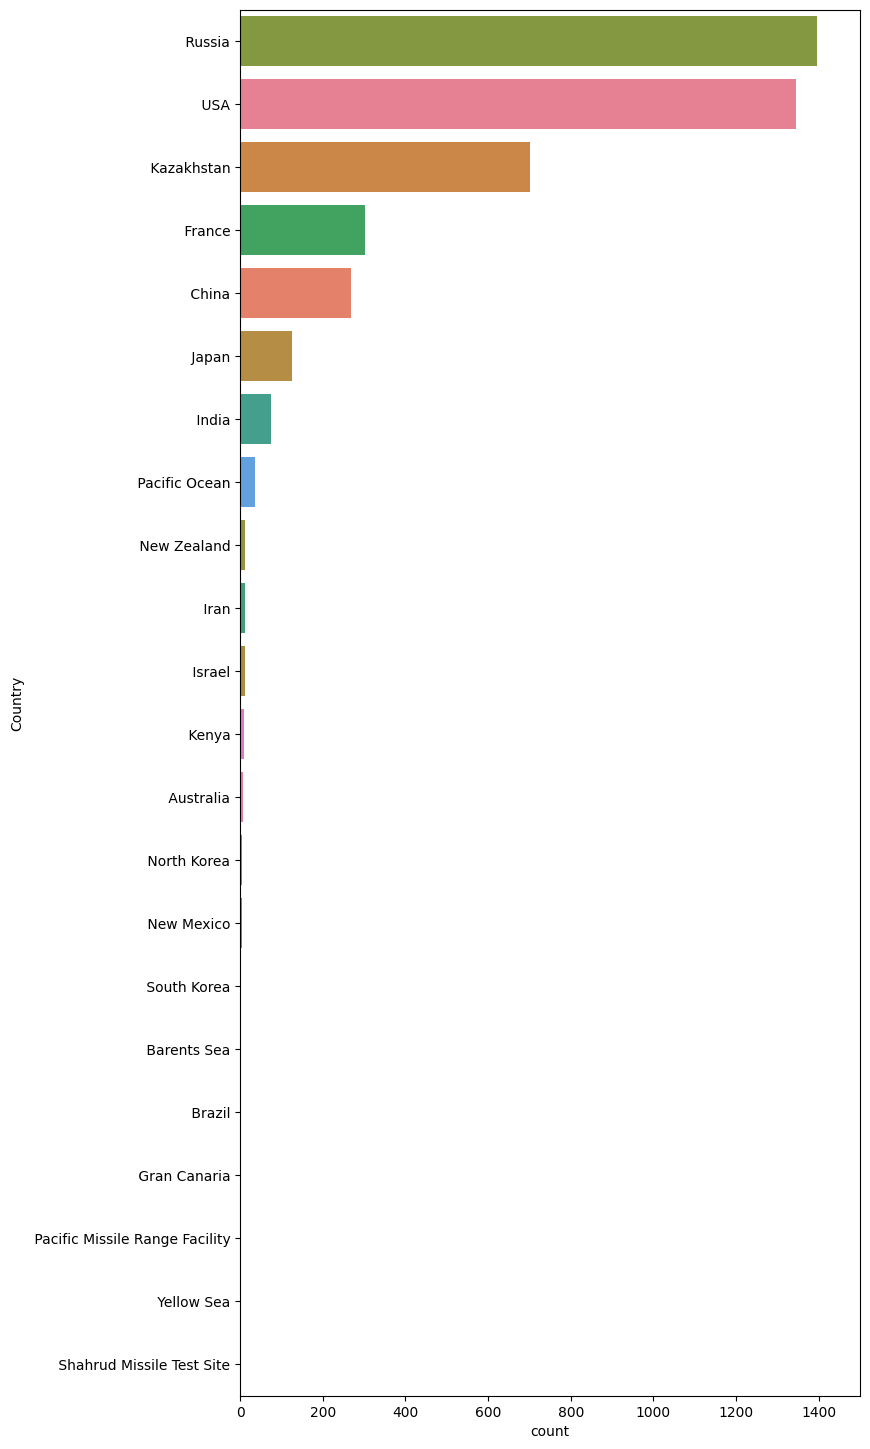

In [51]:
plt.figure(figsize=(8,18))
sns.countplot(y='Country', data=df_data, order=df_data['Country'].value_counts().index, hue='Country')
plt.xlim(0,1500)

In [52]:
space_mission_cost = df_data.groupby(['Company Name'])['Rocket'].sum()
print(space_mission_cost)

Company Name
AEB                     0.00
AMBA                    0.00
ASI                     0.00
Arianespace        16,345.00
Arm??e de l'Air         0.00
Blue Origin             0.00
Boeing              1,241.00
CASC                6,340.26
CASIC                   0.00
CECLES                  0.00
CNES                    0.00
Douglas                 0.00
EER                    20.00
ESA                    37.00
Eurockot              543.40
ExPace                 28.30
Exos                    0.00
General Dynamics        0.00
IAI                     0.00
ILS                 1,320.00
IRGC                    0.00
ISA                     0.00
ISAS                    0.00
ISRO                2,177.00
JAXA                  168.00
KARI                    0.00
KCST                    0.00
Khrunichev              0.00
Kosmotras             638.00
Land Launch             0.00
Landspace               0.00
Lockheed              280.00
MHI                 3,532.50
MITT                    0.00
M

In [53]:
avg_mission_cost = df_data.groupby(['Company Name'])['Rocket'].mean()
print(avg_mission_cost)

Company Name
AEB                  0.00
AMBA                 0.00
ASI                  0.00
Arianespace         58.58
Arm??e de l'Air      0.00
Blue Origin          0.00
Boeing               9.12
CASC                25.26
CASIC                0.00
CECLES               0.00
CNES                 0.00
Douglas              0.00
EER                 20.00
ESA                  2.85
Eurockot            41.80
ExPace               2.83
Exos                 0.00
General Dynamics     0.00
IAI                  0.00
ILS                 28.70
IRGC                 0.00
ISA                  0.00
ISAS                 0.00
ISRO                28.64
JAXA                24.00
KARI                 0.00
KCST                 0.00
Khrunichev           0.00
Kosmotras           29.00
Land Launch          0.00
Landspace            0.00
Lockheed             3.54
MHI                 42.05
MITT                 0.00
Martin Marietta      6.33
NASA               375.76
Northrop            47.35
OKB-586              0.00

# **Price per Company on space launches**

<Axes: xlabel='Company Name'>

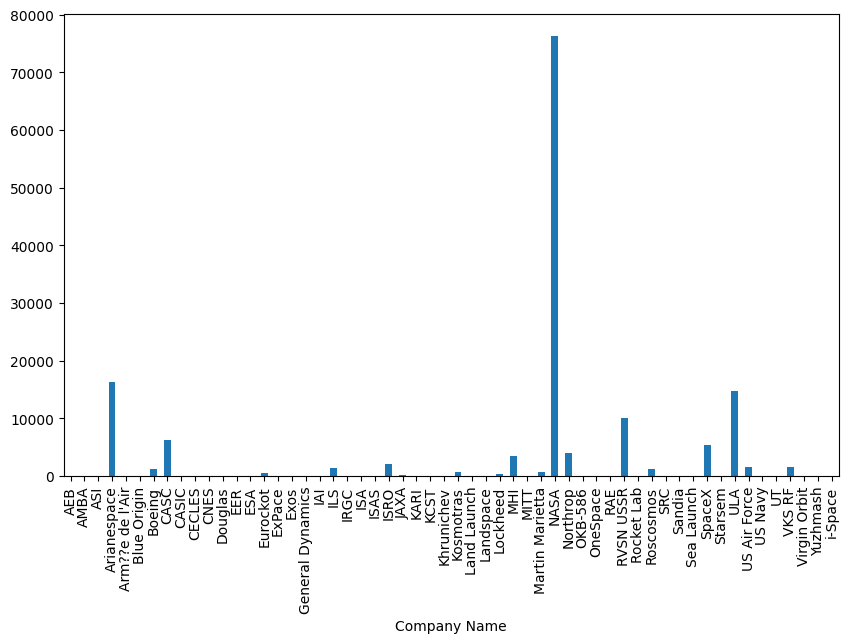

In [54]:
df = df_data.groupby(["Company Name"])["Rocket"].sum().reset_index()
df.plot(kind="bar", x="Company Name", y="Rocket", figsize=(10,6),legend=False)


# **Price per country for space launches**

<Axes: xlabel='Country'>

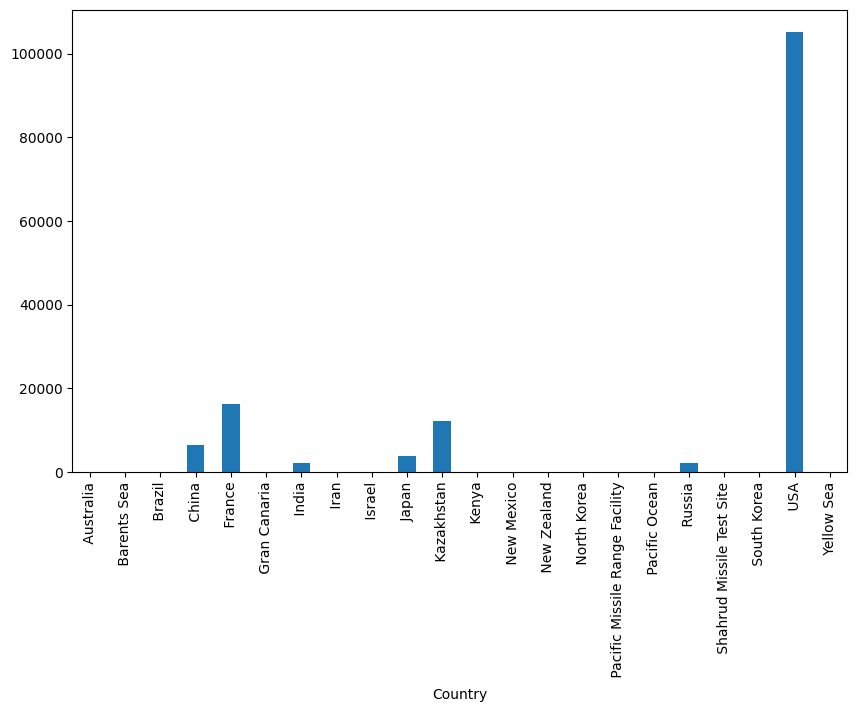

In [55]:
df = df_data.groupby(["Country"])["Rocket"].sum().reset_index()
df.plot(kind="bar", x="Country", y="Rocket", figsize=(10,6),legend=False)


# **Total Price per Year spent on space launches by various countries between 1957 and 2020**

<Axes: xlabel='Year'>

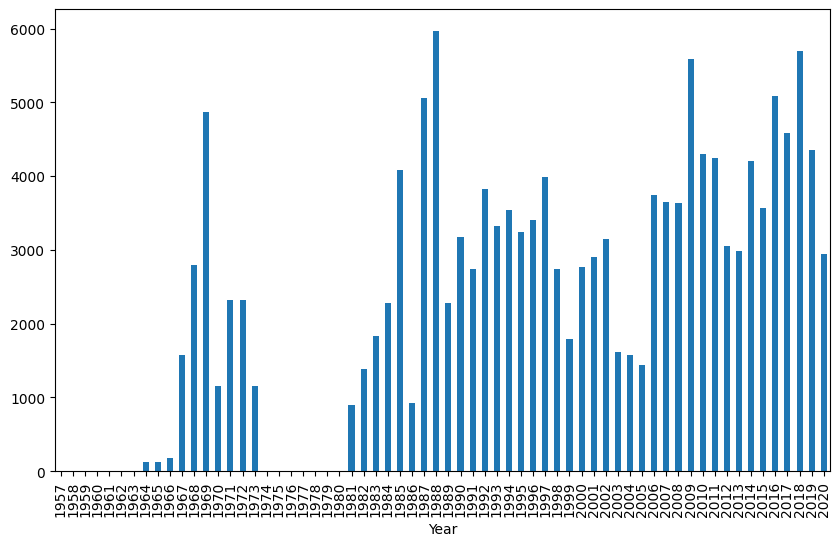

In [56]:
df = df_data.groupby(["Year"])["Rocket"].sum().reset_index()
df.plot(kind="bar", x="Year", y="Rocket", figsize=(10,6),legend=False)


# **Price Of Launch Per Organisation split by Active and Inactive**

In [57]:
cat_active_inactive = df_data.groupby(['Company Name', 'Status Rocket'],
                                   as_index=False).agg({'Rocket': pd.Series.count})
cat_active_inactive.sort_values('Rocket', ascending=False, inplace=True)
v_bar_split = px.bar(x = cat_active_inactive['Company Name'],
                         y = cat_active_inactive.Rocket,
                         color = cat_active_inactive['Status Rocket'],
                         title='Price Of Launch Per Organisation split by Active and Inactive')

v_bar_split.update_layout(xaxis_title='Organisations',
                              yaxis_title='Rocket Price')
v_bar_split.show()

# **Status "Active" and Status "Inactive" Rockets**

# **Countplot**

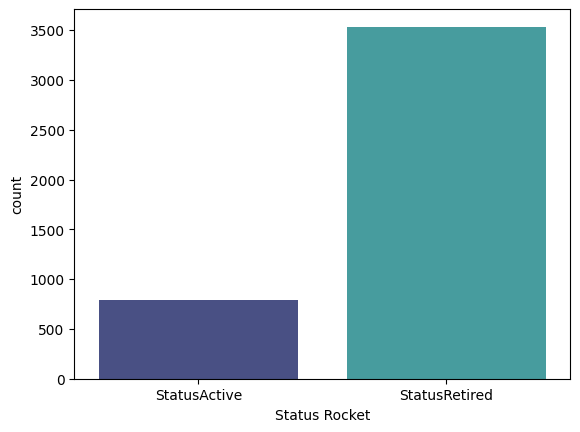

In [58]:
sns.countplot(x="Status Rocket", data=df_data, hue='Status Rocket', palette='mako')
plt.show()

# **Bar Chart Showing Mission Status Per Company**

In [59]:
v_bar = px.bar(
            x = df_data['Company Name'],
            y = df_data['Status Mission'],

            color_continuous_scale='Aggrnyl',
            title='Mission-Status per Company')

v_bar.update_layout(xaxis_title='Space Companies',
                        coloraxis_showscale=False,
                        yaxis_title='Mission-Status')
v_bar.show()

Text(0.5, 1.0, 'Mission Status Distribution')

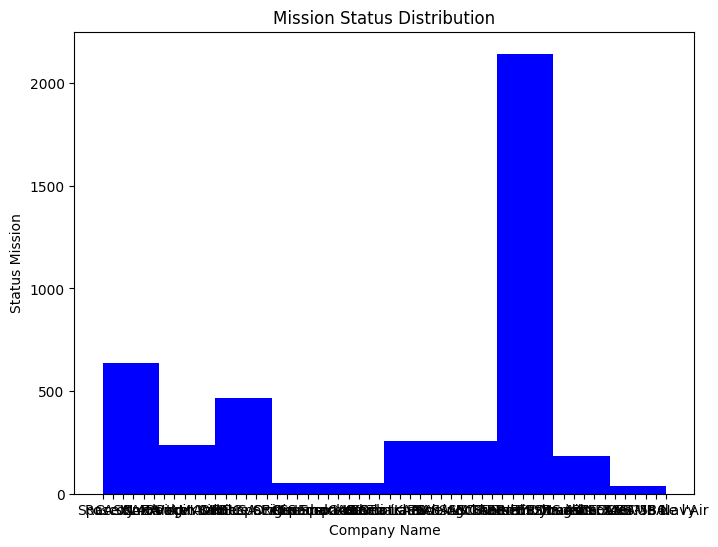

In [60]:
# draw a histogram with blue bars and a grid
df_data['Company Name'].hist(color='blue', grid=False, figsize=(8,6))

# add labels and title
plt.xlabel('Company Name')
plt.ylabel('Status Mission')
plt.title('Mission Status Distribution')



# **Histogram For Organisations and Number Of Launches showing success, failure, prelaunch failure and partial failure**

In [61]:
fig = px.histogram(df_data, x="Company Name", color="Status Mission", labels={'x':'Company Name', 'y':'Status Mission'})
fig.show()

# **Histogram For Status Of Mission**

In [62]:
fig = px.histogram(df_data, color="Status Mission", x=df_data['Status Mission'])
fig.show()

# **ISO Codes For Countries**

In [63]:
def iso(country):
     try:
         iso = pycountry.countries.search_fuzzy(country)
     except Exception:
         return np.nan
     else:
         return iso[0].alpha_3

df_data['ISO'] = df_data['Country'].apply(lambda country: iso(country))
df_data['ISO']

0       USA
1       CHN
2       USA
3       KAZ
4       USA
       ... 
4319    USA
4320    USA
4321    USA
4322    KAZ
4323    KAZ
Name: ISO, Length: 4324, dtype: object

In [64]:
#iso_map = {country: do_fuzzy_search(country) for country in df["Country"].unique()}
#df["country_code"] = df["Country"].map(iso_map)

In [65]:
df_iso = df_data['ISO'].value_counts()

# **Chloropleth Map Showing Coutries In The Space Race And Number Of Launches**

In [66]:
world_map = px.choropleth(df_iso,
                          locations=df_iso.index,
                          color=df_iso.values,
                          hover_name=df_iso.index,
                          color_continuous_scale=px.colors.sequential.matter)

world_map.update_layout(coloraxis_showscale=True,)

world_map.show()

# **Number Of Launches Per Year**

In [67]:
yearly_launches = df_data['Year'].value_counts()
v_bar = px.bar(
            x = yearly_launches.index,
            y = yearly_launches.values,
            color = yearly_launches.values,
            color_continuous_scale=px.colors.diverging.BrBG,
            title='Number of Launches per Year')

v_bar.update_layout(xaxis_title='Year',
                        coloraxis_showscale=False,
                        yaxis_title='Number of Launches')
v_bar.show()

# **Number Of Launches Per Month**

In [68]:
df_data['Month'] = df_data['Time'].apply(lambda datetime: datetime.strftime('%B'))
df_data['Month']

0         August
1         August
2         August
3           July
4           July
          ...   
4319    February
4320    February
4321    December
4322    November
4323     October
Name: Month, Length: 4324, dtype: object

In [69]:
monthly_launches = df_data['Month'].value_counts()
v_bar = px.bar(
            x = monthly_launches.index,
            y = monthly_launches.values,
            color = monthly_launches.values,
            color_continuous_scale=["red","green","blue"],
            title='Number of Launches per Month')

v_bar.update_layout(xaxis_title='Month',
                        coloraxis_showscale=False,
                        yaxis_title='Number of Launches')
v_bar.show()

# **Number Of Launches Per Day**

In [70]:
df_data['Day'] = df_data['Time'].apply(lambda datetime: datetime.strftime('%A'))
df_data['Day']

0          Friday
1        Thursday
2         Tuesday
3        Thursday
4        Thursday
          ...    
4319    Wednesday
4320     Saturday
4321       Friday
4322       Sunday
4323       Friday
Name: Day, Length: 4324, dtype: object

In [71]:
weekday_launches = df_data['Day'].value_counts()
v_bar = px.bar(
            x = weekday_launches.index,
            y = weekday_launches.values,
            color = weekday_launches.index,
            color_continuous_scale='px.colors.sequential.Viridis',
            title='Number of Launches per Weekday')

v_bar.update_layout(xaxis_title='Day',
                        coloraxis_showscale=False,
                        yaxis_title='Number of Launches')
v_bar.show()

# **Top 10 organisations By Price Spent On Space Missions**

In [72]:
top_organisations = df_data.groupby(['Company Name'],
                                      as_index=False).agg({'Rocket': pd.Series.count})

top_organisations.sort_values(by='Rocket', inplace=True)
top10_organisations = top_organisations[-10:]
top10_organisations

,Company Name,Rocket
34,Martin Marietta,114
6,Boeing,136
48,ULA,140
49,US Air Force,161
52,VKS RF,201
35,NASA,203
7,CASC,251
17,General Dynamics,251
3,Arianespace,279
40,RVSN USSR,1777


In [73]:
h_bar = px.bar(x=top10_organisations.Rocket,
                   y=top10_organisations['Company Name'],
                   orientation='h',
                   color=top10_organisations.Rocket,
                   color_continuous_scale='Viridis',
                   title='Top 10 Organisations by Price Spent On Space Missions')

h_bar.update_layout(xaxis_title='Cost',
                        yaxis_title='Company',
                        coloraxis_showscale=False)
h_bar.show()

# **Sunburst Chart Showing Countries In The Space Race**

In [74]:
sunburst_data = df_data.groupby(by=['Country','Company Name','Status Mission'], as_index=False).agg({'Rocket': pd.Series.count})

sunburst_data = sunburst_data.sort_values('Rocket', ascending=False)

In [75]:
burst = px.sunburst(sunburst_data,
                        path=['Country', 'Company Name', 'Status Mission'],
                        values='Rocket',
                        title='Which countries and organisations are in the space race?',
                       )

burst.update_layout(xaxis_title='Cost of launches',
                        yaxis_title='Country',
                        coloraxis_showscale=False)

burst.show()

In [76]:
spacerace_countries = df_data.groupby(['ISO']).apply(lambda x: x["ISO"]=="USA")
spacerace_countries

ISO      
AUS  3302    False
     3413    False
     3462    False
     3548    False
     3613    False
             ...  
USA  4317     True
     4318     True
     4319     True
     4320     True
     4321     True
Name: ISO, Length: 4280, dtype: bool

In [77]:
usa_launches = df_data.groupby("Country").filter(lambda x: x.Country.str.contains("USA").any())
usa_launches

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,Country,Time,Year,Month,Day,ISO
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,2020-08-07 05:12:00+00:00,2020,August,Friday,USA
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,0.00,Success,USA,2020-08-04 23:57:00+00:00,2020,August,Tuesday,USA
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA,2020-07-30 11:50:00+00:00,2020,July,Thursday,USA
8,SpaceX,"SLC-40, Cape Canaveral AFS, Florida, USA","Mon Jul 20, 2020 21:30 UTC",Falcon 9 Block 5 | ANASIS-II,StatusActive,50.00,Success,USA,2020-07-20 21:30:00+00:00,2020,July,Monday,USA
10,Northrop,"LP-0B, Wallops Flight Facility, Virginia, USA","Wed Jul 15, 2020 13:46 UTC",Minotaur IV | NROL-129,StatusActive,46.00,Success,USA,2020-07-15 13:46:00+00:00,2020,July,Wednesday,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4317,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Mon Mar 17, 1958 12:15 UTC",Vanguard | Vanguard 1,StatusRetired,0.00,Success,USA,1958-03-17 12:15:00+00:00,1958,March,Monday,USA
4318,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Wed Mar 05, 1958 18:27 UTC",Juno I | Explorer 2,StatusRetired,0.00,Failure,USA,1958-03-05 18:27:00+00:00,1958,March,Wednesday,USA
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,0.00,Failure,USA,1958-02-05 07:33:00+00:00,1958,February,Wednesday,USA
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,0.00,Success,USA,1958-02-01 03:48:00+00:00,1958,February,Saturday,USA


In [78]:
russia_launches = df_data.groupby("Country").filter(lambda x: x.Country.str.contains("Russia").any())
russia_launches

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,Country,Time,Year,Month,Day,ISO
28,VKS RF,"Site 43/4, Plesetsk Cosmodrome, Russia","Fri May 22, 2020 07:31 UTC",Soyuz 2.1b/Fregat-M | Cosmos 2546,StatusActive,0.00,Success,Russia,2020-05-22 07:31:00+00:00,2020,May,Friday,RUS
42,VKS RF,"Site 43/4, Plesetsk Cosmodrome, Russia","Mon Mar 16, 2020 18:28 UTC",Soyuz 2.1b/Fregat-M | Cosmos 2545,StatusActive,0.00,Success,Russia,2020-03-16 18:28:00+00:00,2020,March,Monday,RUS
46,VKS RF,"Site 43/3, Plesetsk Cosmodrome, Russia","Thu Feb 20, 2020 08:24 UTC",Soyuz 2.1a/Fregat-M | Meridian-M n†­19L,StatusActive,48.50,Success,Russia,2020-02-20 08:24:00+00:00,2020,February,Thursday,RUS
64,VKS RF,"Site 133/3, Plesetsk Cosmodrome, Russia","Thu Dec 26, 2019 23:11 UTC","Rokot/Briz KM | Gonets-M ???24, 25, 26 [block-...",StatusRetired,41.80,Success,Russia,2019-12-26 23:11:00+00:00,2019,December,Thursday,RUS
73,VKS RF,"Site 43/3, Plesetsk Cosmodrome, Russia","Wed Dec 11, 2019 08:54 UTC",Soyuz 2.1b/Fregat | Cosmos 2544,StatusActive,48.50,Success,Russia,2019-12-11 08:54:00+00:00,2019,December,Wednesday,RUS
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4167,RVSN USSR,"Mayak-2, Kapustin Yar, Russia","Tue Apr 24, 1962 04:00 UTC",Cosmos-2I (63S1) | Cosmos 3,StatusRetired,0.00,Success,Russia,1962-04-24 04:00:00+00:00,1962,April,Tuesday,RUS
4171,RVSN USSR,"Mayak-2, Kapustin Yar, Russia","Fri Apr 06, 1962 17:15 UTC",Cosmos-2I (63S1) | Cosmos 2,StatusRetired,0.00,Success,Russia,1962-04-06 17:15:00+00:00,1962,April,Friday,RUS
4172,RVSN USSR,"Mayak-2, Kapustin Yar, Russia","Fri Mar 16, 1962 11:59 UTC",Cosmos-2I (63S1) | Cosmos 1,StatusRetired,0.00,Success,Russia,1962-03-16 11:59:00+00:00,1962,March,Friday,RUS
4183,RVSN USSR,"Mayak-2, Kapustin Yar, Russia","Thu Dec 21, 1961 12:30 UTC",Cosmos-2I (63S1) | DS-1 2,StatusRetired,0.00,Failure,Russia,1961-12-21 12:30:00+00:00,1961,December,Thursday,RUS


In [79]:
superpowers=[usa_launches, russia_launches]
superpower_launches = pd.concat(superpowers)
superpower_launches

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,Country,Time,Year,Month,Day,ISO
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,2020-08-07 05:12:00+00:00,2020,August,Friday,USA
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,0.00,Success,USA,2020-08-04 23:57:00+00:00,2020,August,Tuesday,USA
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA,2020-07-30 11:50:00+00:00,2020,July,Thursday,USA
8,SpaceX,"SLC-40, Cape Canaveral AFS, Florida, USA","Mon Jul 20, 2020 21:30 UTC",Falcon 9 Block 5 | ANASIS-II,StatusActive,50.00,Success,USA,2020-07-20 21:30:00+00:00,2020,July,Monday,USA
10,Northrop,"LP-0B, Wallops Flight Facility, Virginia, USA","Wed Jul 15, 2020 13:46 UTC",Minotaur IV | NROL-129,StatusActive,46.00,Success,USA,2020-07-15 13:46:00+00:00,2020,July,Wednesday,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4167,RVSN USSR,"Mayak-2, Kapustin Yar, Russia","Tue Apr 24, 1962 04:00 UTC",Cosmos-2I (63S1) | Cosmos 3,StatusRetired,0.00,Success,Russia,1962-04-24 04:00:00+00:00,1962,April,Tuesday,RUS
4171,RVSN USSR,"Mayak-2, Kapustin Yar, Russia","Fri Apr 06, 1962 17:15 UTC",Cosmos-2I (63S1) | Cosmos 2,StatusRetired,0.00,Success,Russia,1962-04-06 17:15:00+00:00,1962,April,Friday,RUS
4172,RVSN USSR,"Mayak-2, Kapustin Yar, Russia","Fri Mar 16, 1962 11:59 UTC",Cosmos-2I (63S1) | Cosmos 1,StatusRetired,0.00,Success,Russia,1962-03-16 11:59:00+00:00,1962,March,Friday,RUS
4183,RVSN USSR,"Mayak-2, Kapustin Yar, Russia","Thu Dec 21, 1961 12:30 UTC",Cosmos-2I (63S1) | DS-1 2,StatusRetired,0.00,Failure,Russia,1961-12-21 12:30:00+00:00,1961,December,Thursday,RUS


In [80]:
superpowers = superpower_launches['Country'].rename_axis(['Country']).reset_index(name="counts")
superpowers

,Country,counts
0,0,USA
1,2,USA
2,4,USA
3,8,USA
4,10,USA
...,...,...
2734,4167,Russia
2735,4171,Russia
2736,4172,Russia
2737,4183,Russia


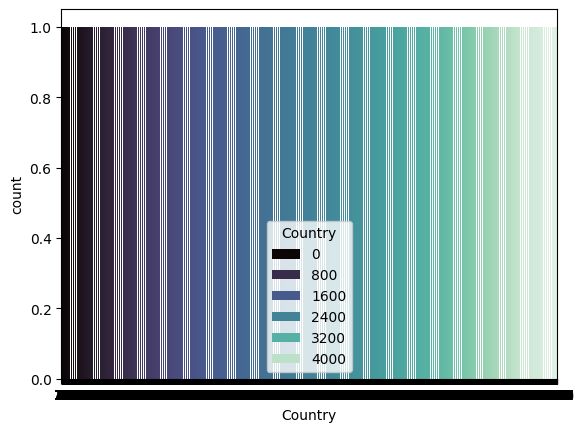

In [81]:
sns.countplot(x="Country", data=superpowers, hue='Country', palette='mako')
plt.show()

In [82]:
fig = px.histogram(
    superpowers,
    x=["Country"],
    facet_col="variable",
    color="counts",
    barmode="group",
    histnorm="percent",
    text_auto=".2r",
).update_xaxes(matches=None, showticklabels=True).update_yaxes(matches=None, showticklabels=True)

fig.show()

In [90]:
fig = px.pie(superpower_launches, values="Year", names="Country")
fig.update_traces(textposition='inside', textinfo='percent+label',textfont_size=10)
fig.show()

In [95]:
status = superpower_launches['Status Mission'].value_counts()
fig = px.pie(labels=status.index,
                 values=status.values,
                 title="",
                 names=status.index,
                 hole=0.4,)

fig.update_traces(textposition='inside', textfont_size=15, textinfo='percent')

fig.show()

In [98]:
status = superpower_launches['Year'].value_counts()
fig = px.pie(labels=status.index,
                 values=status.values,
                 title="Percentage of Yearly Launches By Russia and USA",
                 names=status.index,
                 hole=0.4,)

fig.update_traces(textposition='inside', textfont_size=15, textinfo='percent')

fig.show()

<Axes: xlabel='Year'>

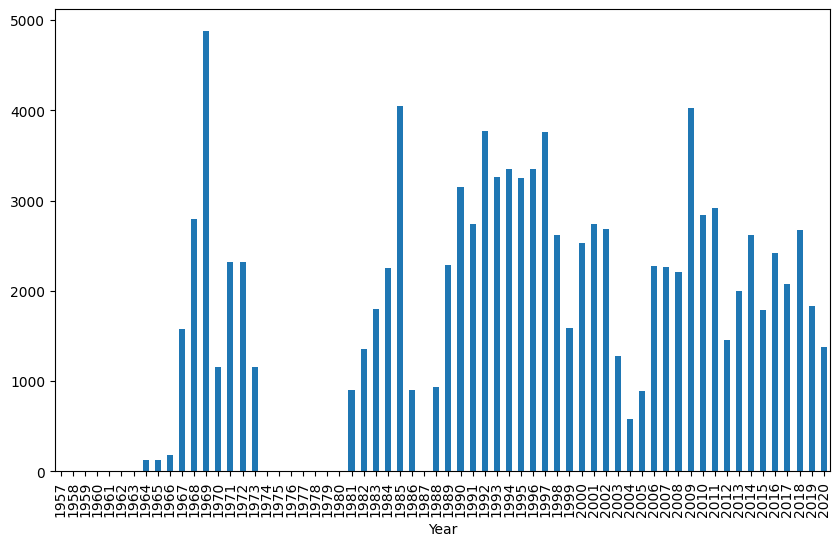

In [113]:
df = superpower_launches.groupby(["Year"])["Rocket"].sum().reset_index()
df.plot(kind="bar", x="Year", y="Rocket", figsize=(10,6),legend=False)